In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#from google.colab import drive
#drive.mount('/content/drive')

#file_path = '/content/drive/My Drive/Colab Notebooks/heart.csv'



In [18]:
#data = pd.read_csv(file_path)
data = pd.read_csv('/Users/rowanahmed/Downloads/heart.csv')

In [19]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [21]:
data.shape

(918, 12)

In [22]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [23]:
train, test = train_test_split(data, test_size=0.2, random_state= 4)

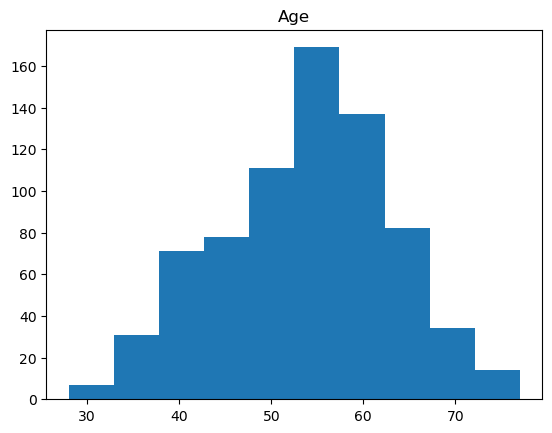

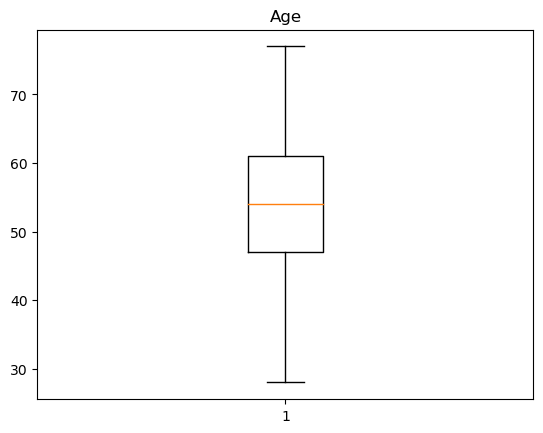

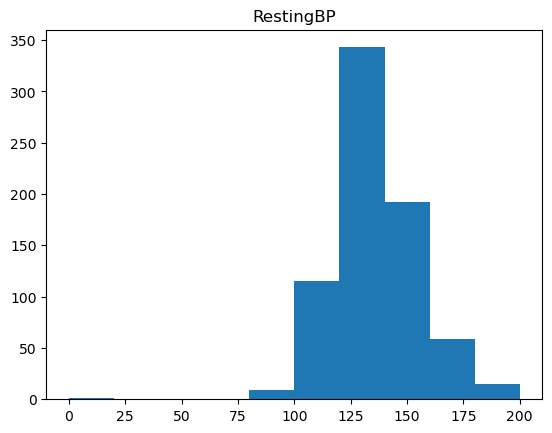

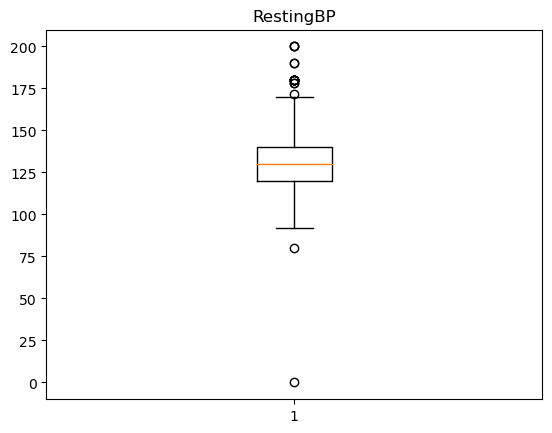

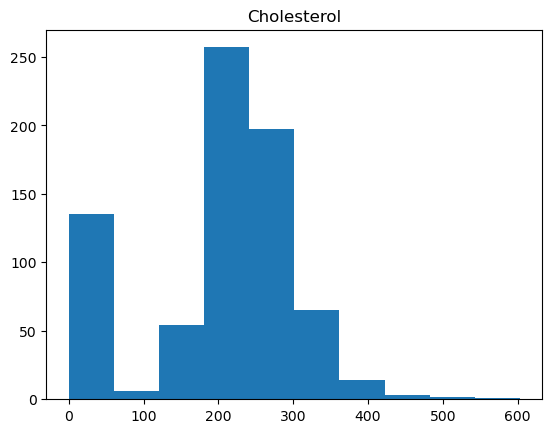

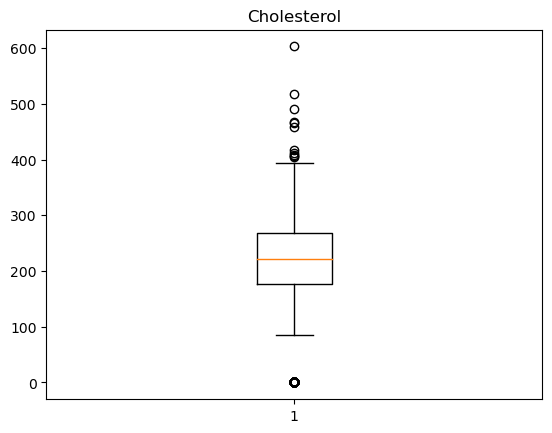

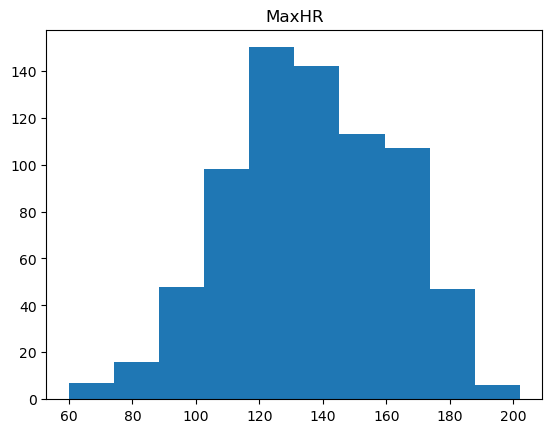

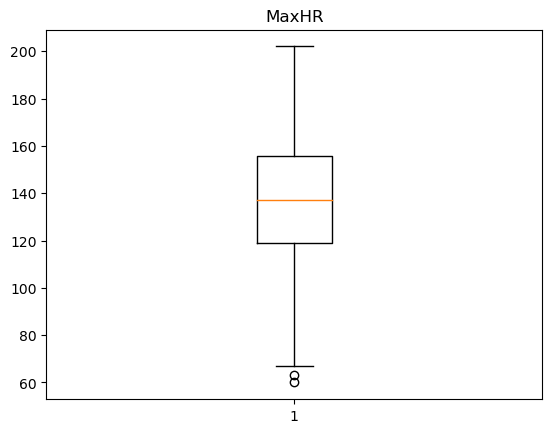

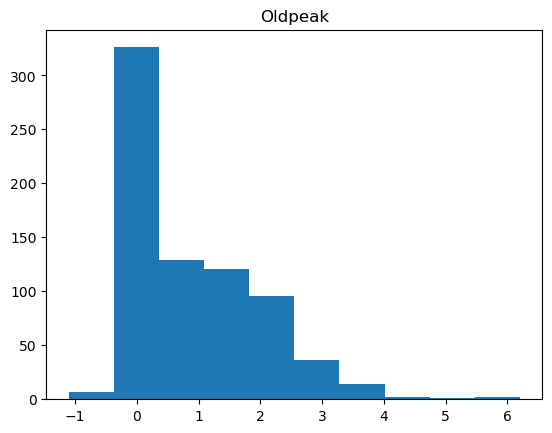

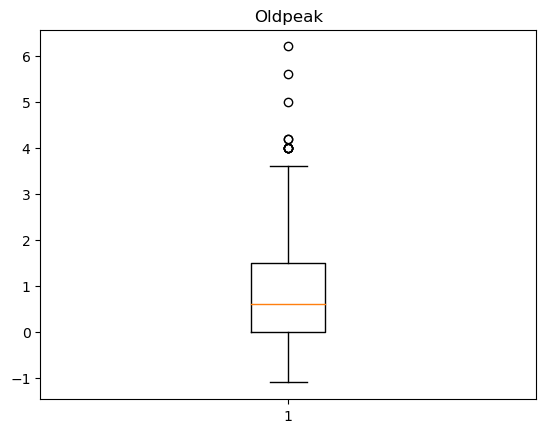

In [24]:
train_data_num = train [["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]]
for i in train_data_num.columns:
  plt.hist(train_data_num[i])
  plt.title(i)
  plt.show()
  plt.boxplot(train_data_num[i])
  plt.title(i)
  plt.show()

<Axes: >

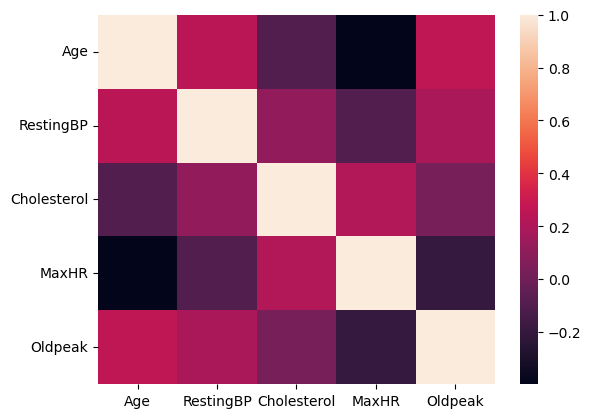

In [25]:
sns.heatmap(train_data_num.corr())

In [26]:
pd.pivot_table(train, index="HeartDisease", values=["Age","RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"])

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingBP
HeartDisease,,,,,,
0,50.667702,227.801242,0.10559,147.468944,0.420497,130.23913
1,56.089806,178.000000,0.32767,127.526699,1.294903,134.31068


In [27]:
train_data_quali = train[['Sex','ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]

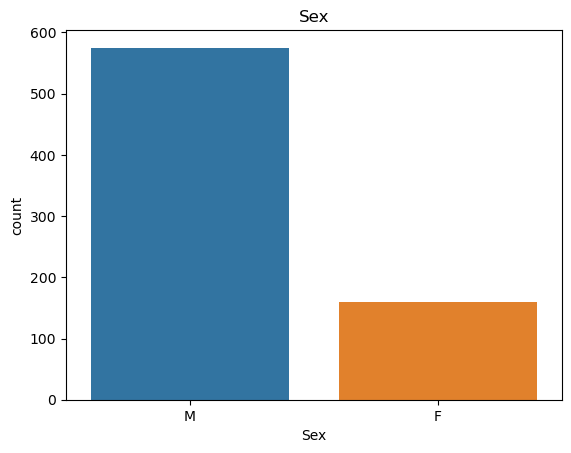

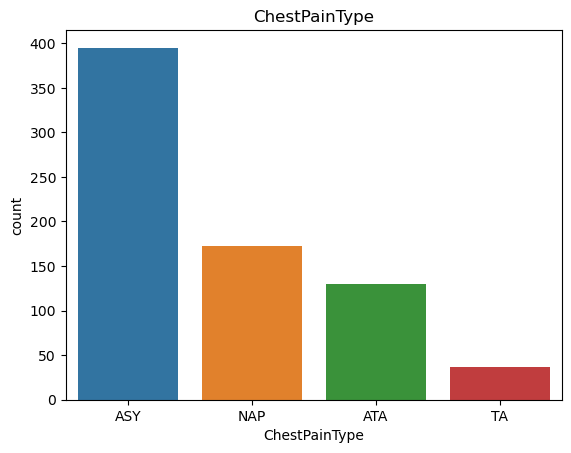

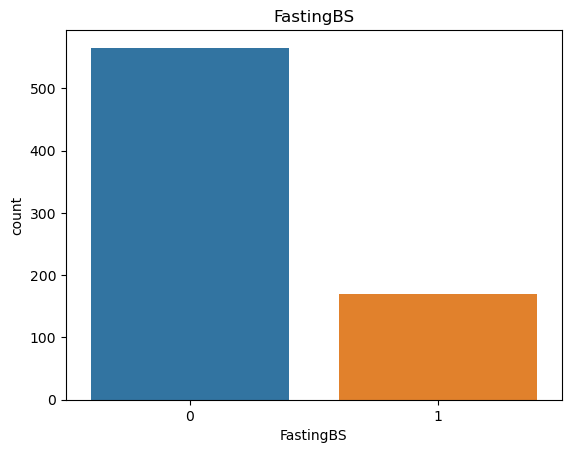

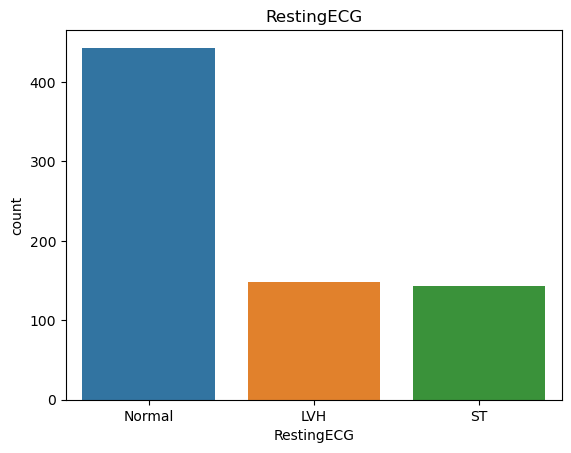

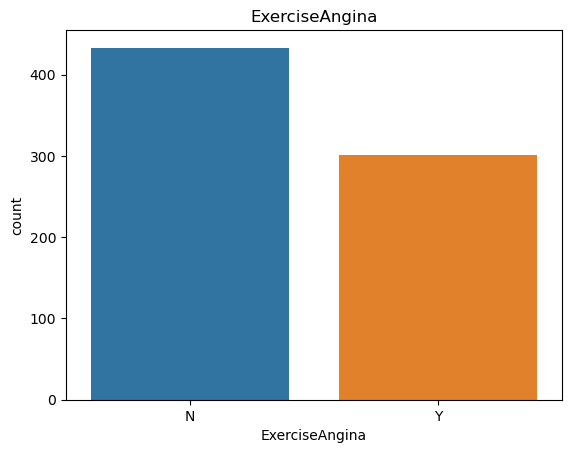

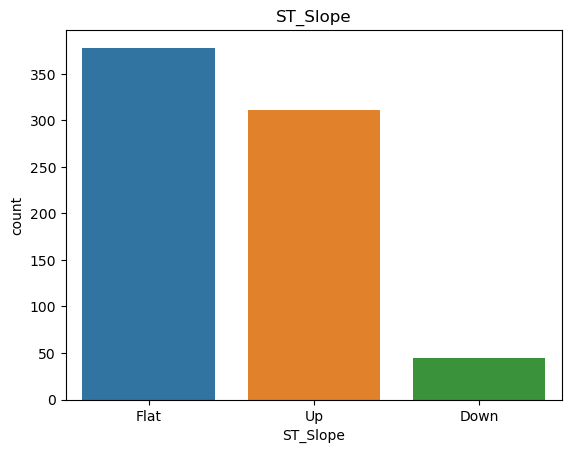

In [28]:
for info in train_data_quali.columns:
  sns.barplot(x=train_data_quali[info].value_counts().index, y=train_data_quali[info].value_counts()).set_title(info)
  plt.show()

In [29]:
train = pd.get_dummies(train) #conversion des données qualitatives en données numériques pour rntrainer les modèles
test = pd.get_dummies(test)

In [30]:
train.head(20)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
425,60,160,267,1,157,0.5,1,False,True,False,...,False,False,False,False,True,True,False,False,True,False
89,55,140,229,0,110,0.5,0,False,True,True,...,False,False,False,True,False,False,True,False,True,False
777,55,130,262,0,155,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
239,48,160,193,0,102,3.0,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
889,59,134,204,0,162,0.8,1,False,True,False,...,False,True,False,True,False,True,False,False,False,True
894,58,130,197,0,131,0.6,0,True,False,True,...,False,False,False,True,False,True,False,False,True,False
504,62,158,210,1,112,3.0,1,False,True,True,...,False,False,False,True,False,False,True,True,False,False
424,60,120,0,1,141,2.0,1,False,True,False,...,True,False,False,True,False,False,True,False,False,True
224,55,120,256,1,137,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
890,64,170,227,0,155,0.6,0,False,True,False,...,False,True,True,False,False,True,False,False,True,False


In [31]:
x_train = train.drop(columns = ["HeartDisease"])
y_train = train["HeartDisease"]

x_test = test.drop(columns = ["HeartDisease"])
y_test = test["HeartDisease"]

In [32]:
model = LogisticRegression()

In [33]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

/Users/rowanahmed/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8651226158038147

In [34]:
model.predict(x_train)

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,

In [40]:
y_pred = model.predict(x_test)

In [35]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [36]:
def survie(model, Age=25, RestingBP=140, Cholesterol=150, FastingBS=0, MaxHR=120, Oldpeak=0.5, HeartDisease=0, Sex_F=True, Sex_M=False, ChestPainType_ASY=False, ChestPainType_NAP=False, ChestPainType_TA=False, RestingECG_LVH=True, RestingECG_Normal=False, RestingECG_ST=False, ExerciseAngina_N=True, ExerciseAngina_Y=False, ST_Slope_Down=True, ST_Slope_Flat=True, ST_Slope_Up=False):
  x = np.array([ Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease, Sex_F, Sex_M, ChestPainType_ASY, ChestPainType_NAP, ChestPainType_TA, RestingECG_LVH, RestingECG_Normal, RestingECG_ST, ExerciseAngina_N, ExerciseAngina_Y, ST_Slope_Down, ST_Slope_Flat, ST_Slope_Up]).reshape(1, 20)
  print(model.predict(x))
  print(model.predict_proba(x))

In [37]:
survie(model)

[1]
[[0.36032764 0.63967236]]


/Users/rowanahmed/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/rowanahmed/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.91      0.82      0.86        88\n           1       0.85      0.93      0.89        96\n\n    accuracy                           0.88       184\n   macro avg       0.88      0.87      0.87       184\nweighted avg       0.88      0.88      0.87       184\n'